## Testing Pytesseract library in different use cases

Three cases have been studied to apply the utilities of the Pytesseract Library. The cases are:

- Image with flat text
- Image with simple table
- Image with complex table



In [ ]:
import PIL
import IPython
import pandas as pd
import pytesseract
import numpy as np
import cv2

In [87]:
pytesseract.pytesseract.tesseract_cmd = "C:/Users/shiru/anaconda3/envs/gputf/Library/bin/tesseract.exe"

### 1. Imagen solo con texto plano

In [88]:
img1 = r'../data/plane_text.png'

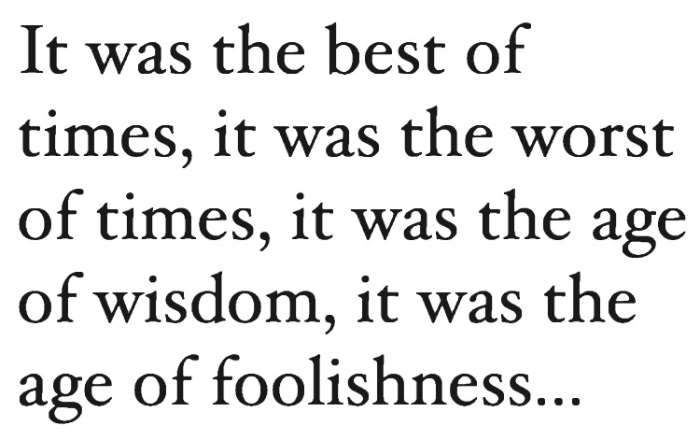

In [91]:
IPython.display.Image(filename=img1) 

In [90]:
# Simple image to string
print(pytesseract.image_to_string(PIL.Image.open(img1), lang = 'eng'))

It was the best of
times, it was the worst
of times, it was the age
of wisdom, it was the
age of foolishness...



### 2. Imagen con tabla

In [6]:
img2 = '../data/table_text.png'

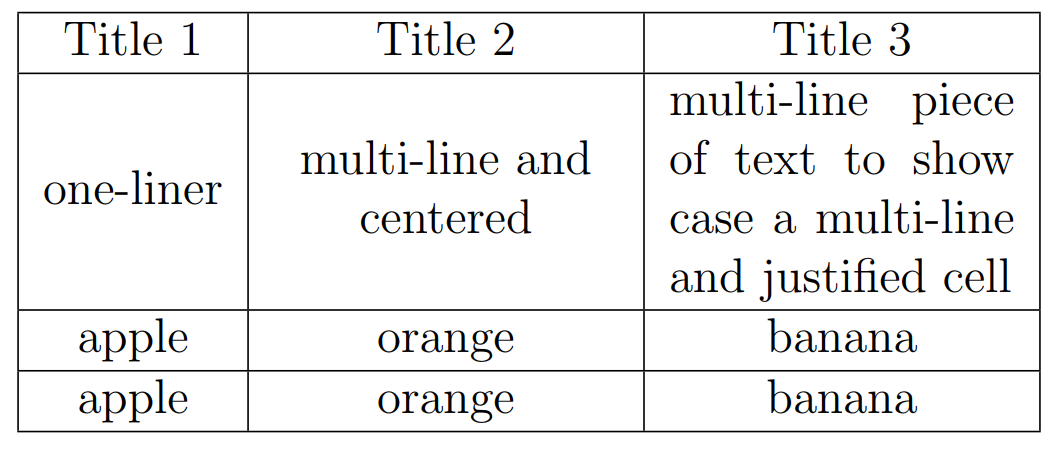

In [92]:
IPython.display.Image(filename=img2) 

In [7]:
# Simple image to string
print(pytesseract.image_to_string(Image.open(img2), lang = 'eng'))

Title 1

Title 2

Title 3

multi-line and

multi-line piece
of text to show

one-liner centered case a multi-line
and justified cell
apple orange banana
apple orange banana




In [8]:
text2 = pytesseract.image_to_string(Image.open(img2), lang = 'eng')
text2.split('\n\n')

['Title 1',
 'Title 2',
 'Title 3',
 'multi-line and',
 'multi-line piece\nof text to show',
 'one-liner centered case a multi-line\nand justified cell\napple orange banana\napple orange banana',
 '']

In [9]:
# Load image, grayscale, and Otsu's threshold
image = cv2.imread(img2)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]

cv2.imshow('thresh', thresh)
cv2.waitKey()

-1

In [10]:
# Remove horizontal lines
horizontal_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, ( int(np.round(gray.shape[1]*0.8)) , 1))
                                              
detect_horizontal = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, horizontal_kernel, iterations=2)
cnts = cv2.findContours(detect_horizontal, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if len(cnts) == 2 else cnts[1]
for c in cnts:
    cv2.drawContours(thresh, [c], -1, (0,0,0), 2)
    
cv2.imshow('thresh', thresh)
cv2.waitKey()

-1

In [11]:
# Remove vertical lines
vertical_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (1, int(np.round(gray.shape[0]*0.8)) ))
detect_vertical = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, vertical_kernel, iterations=2)
cnts = cv2.findContours(detect_vertical, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if len(cnts) == 2 else cnts[1]
for c in cnts:
    cv2.drawContours(thresh, [c], -1, (0,0,0), 3)
    
cv2.imshow('thresh', thresh)
cv2.waitKey()

-1

In [13]:
text = pytesseract.image_to_data(thresh)
text.split('\t')

['level',
 'page_num',
 'block_num',
 'par_num',
 'line_num',
 'word_num',
 'left',
 'top',
 'width',
 'height',
 'conf',
 'text\n1',
 '1',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '1054',
 '461',
 '-1',
 '\n2',
 '1',
 '1',
 '0',
 '0',
 '0',
 '17',
 '9',
 '1024',
 '7',
 '-1',
 '\n3',
 '1',
 '1',
 '1',
 '0',
 '0',
 '17',
 '9',
 '1024',
 '7',
 '-1',
 '\n4',
 '1',
 '1',
 '1',
 '1',
 '0',
 '17',
 '9',
 '1024',
 '7',
 '-1',
 '\n5',
 '1',
 '1',
 '1',
 '1',
 '1',
 '17',
 '9',
 '1024',
 '7',
 '95.000000',
 ' \n2',
 '1',
 '2',
 '0',
 '0',
 '0',
 '65',
 '21',
 '134',
 '35',
 '-1',
 '\n3',
 '1',
 '2',
 '1',
 '0',
 '0',
 '65',
 '21',
 '134',
 '35',
 '-1',
 '\n4',
 '1',
 '2',
 '1',
 '1',
 '0',
 '65',
 '21',
 '134',
 '35',
 '-1',
 '\n5',
 '1',
 '2',
 '1',
 '1',
 '1',
 '65',
 '21',
 '97',
 '35',
 '96.742813',
 'Title\n5',
 '1',
 '2',
 '1',
 '1',
 '2',
 '183',
 '23',
 '16',
 '32',
 '96.308075',
 '1\n2',
 '1',
 '3',
 '0',
 '0',
 '0',
 '377',
 '21',
 '137',
 '35',
 '-1',
 '\n3',
 '1',
 '3',
 '1',
 '0',
 '0'

In [23]:
pd.DataFrame(pytesseract.image_to_data(thresh), delimiter = '\t')

TypeError: __init__() got an unexpected keyword argument 'delimiter'

In [14]:
data = pytesseract.image_to_string(thresh, lang='eng')
print(data)

Title 1

Title 2

Title 3

multi-line and

multi-line piece
of text to show

one-liner centered case a multi-line
and justified cell
apple orange banana
apple orange banana




In [15]:
data

'Title 1\n\nTitle 2\n\nTitle 3\n\nmulti-line and\n\nmulti-line piece\nof text to show\n\none-liner centered case a multi-line\nand justified cell\napple orange banana\napple orange banana\n\n'

### 3. Imagen con tabla difícil

In [16]:
# Load image, grayscale, and Otsu's threshold
image = cv2.imread(img2)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]
cImage = np.copy(image) 

cv2.imshow('thresh', thresh)
cv2.waitKey()

-1

In [17]:
theta = np.pi/180
rho = 1
threshold = 50
minLinLength = int(np.round(gray.shape[0]*0.8))
maxLineGap = 6

linesP = cv2.HoughLinesP(thresh, rho , theta, threshold, None, minLinLength, maxLineGap)

In [18]:
linesP

array([[[  17,  309, 1040,  309]],

       [[  17,  431, 1040,  431]],

       [[  17,  370, 1040,  370]],

       [[  17,  371, 1040,  371]],

       [[  17,   12, 1040,   12]],

       [[  17,   72, 1040,   72]],

       [[  17,   73, 1040,   73]],

       [[  17,  310, 1040,  310]],

       [[ 247,  430,  247,   13]],

       [[ 643,  430,  643,   13]],

       [[ 248,  430,  248,   13]],

       [[  17,  430,   17,   13]],

       [[1039,  430, 1039,   13]],

       [[ 644,  430,  644,   13]],

       [[1040,  430, 1040,   13]],

       [[  18,  430,   18,   13]]], dtype=int32)

In [19]:
def overlapping_filter(lines, sorting_index):
    filtered_lines = []
    
    lines = sorted(lines, key=lambda lines: lines[sorting_index])
    separation = 5    
    
    for i in range(len(lines)):
            l_curr = lines[i]
            if(i>0):
                l_prev = lines[i-1]
                if ( (l_curr[sorting_index] - l_prev[sorting_index]) > separation):
                    filtered_lines.append(l_curr)
            else:
                filtered_lines.append(l_curr)
                
    return filtered_lines

In [20]:
def is_vertical(line):
    return line[0]==line[2]

def is_horizontal(line):
    return line[1]==line[3]

horizontal_lines = []
vertical_lines = []
    
if linesP is not None:
    for i in range(0, len(linesP)):
        l = linesP[i][0]        
        if (is_vertical(l)):
            vertical_lines.append(l)
                
        elif (is_horizontal(l)):
            horizontal_lines.append(l)
            
horizontal_lines = overlapping_filter(horizontal_lines, 1)
vertical_lines = overlapping_filter(vertical_lines, 0)
            
for i, line in enumerate(horizontal_lines):
    cv2.line(cImage, (line[0], line[1]), (line[2], line[3]), (0,255,0), 3, cv2.LINE_AA)
                      
for i, line in enumerate(vertical_lines):
    cv2.line(cImage, (line[0], line[1]), (line[2], line[3]), (0,0,255), 3, cv2.LINE_AA)
            
cv2.imshow("with_line", cImage)
cv2.waitKey(0)

-1

In [49]:
vertical_lines

[array([ 17, 430,  17,  13], dtype=int32),
 array([247, 430, 247,  13], dtype=int32),
 array([643, 430, 643,  13], dtype=int32),
 array([1039,  430, 1039,   13], dtype=int32)]

In [48]:
horizontal_lines

[array([  17,   12, 1040,   12], dtype=int32),
 array([  17,   72, 1040,   72], dtype=int32),
 array([  17,  309, 1040,  309], dtype=int32),
 array([  17,  370, 1040,  370], dtype=int32),
 array([  17,  431, 1040,  431], dtype=int32)]

In [34]:
def get_cropped_image(image, x, y, w, h):
    cropped_image = image[ y:y+h , x:x+w ]
    return cropped_image

def get_ROI(image, horizontal, vertical, left_line_index, right_line_index, top_line_index, bottom_line_index, offset=4):
    x1 = vertical[left_line_index][2] + offset
    y1 = horizontal[top_line_index][3] + offset
    x2 = vertical[right_line_index][2] - offset
    y2 = horizontal[bottom_line_index][3] - offset
    
    w = x2 - x1
    h = y2 - y1
    
    cropped_image = get_cropped_image(image, x1, y1, w, h)
    
    return cropped_image, (x1, y1, w, h)

In [58]:
def draw_text(src, x, y, w, h, text):
    
    cFrame = np.copy(src)
    cv2.rectangle(cFrame, (x, y), (x+w, y+h), (255, 0, 0), 2)
    cv2.putText(cFrame, "text: " + text, (50, 50), cv2.FONT_HERSHEY_SIMPLEX, 2, (0, 0, 0), 5, cv2.LINE_AA)
    
    return cFrame

def detect(cropped_frame, is_number = False):
    
    text = pytesseract.image_to_string(cropped_frame)
    return text

In [59]:
image = cv2.imread(img2)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

In [63]:
## set line index
first_line_index = 0
last_line_index = 4

keywords = ['0', '1', '2']

dict_kabupaten = {}
for keyword in keywords:
    dict_kabupaten[keyword] = []

In [64]:
counter = 0
print("Start detecting text...")

(thresh, bw) = cv2.threshold(gray, 100, 255, cv2.THRESH_BINARY)

for i in range(first_line_index, last_line_index):
    
    for j, keyword in enumerate(keywords):
        counter += 1
            
        left_line_index = j
        right_line_index = j+1
        top_line_index = i
        bottom_line_index = i+1
            
        cropped_image, (x,y,w,h) = get_ROI(bw, horizontal_lines, vertical_lines, left_line_index, right_line_index, top_line_index, bottom_line_index)
        
        text = detect(cropped_image)
        dict_kabupaten[keyword].append(text)
            
image_with_text = draw_text(image, x, y, w, h, text)

Start detecting text...


In [65]:
dict_kabupaten

{'0': ['Title 1\n', 'one-liner\n', 'apple\n', 'apple\n'],
 '1': ['Title 2\n', 'multi-line and\ncentered\n', 'orange\n', 'orange\n'],
 '2': ['Title 3\n',
  'multi-line piece\nof text to show\ncase a multi-line\nand justified cell\n',
  'banana\n',
  'banana\n']}

In [73]:
df = pd.DataFrame(dict_kabupaten)
df = df.replace('\n', '', regex=True)
df.columns = df.iloc[0]
df = df[1:]
df

,Title 1,Title 2,Title 3
1,one-liner,multi-line andcentered,multi-line pieceof text to showcase a multi-li...
2,apple,orange,banana
3,apple,orange,banana
